In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

$$y_t=\mu+\epsilon_t$$
$$\epsilon_t=\sigma_t*z_t$$
$$\sigma^2_t=\alpha_0+\alpha_1^{2}*\epsilon^2_{t-1}$$
$$\sigma^2_0=\frac{\alpha_0}{1-\alpha_1}$$

### 生成一些示例數據

In [3]:
np.random.seed(42)
n = 1000
alpha0 = 0.2
alpha1 = 0.5

In [5]:
# 初始值
y = np.zeros(n)
epsilon = np.zeros(n)
sigma2 = np.zeros(n)
sigma2[0] = alpha0 / (1 - alpha1)  # 初始化方差

for t in range(1, n):
    epsilon[t] = np.random.normal(scale=np.sqrt(sigma2[t-1])) #預設為loc=0, scale=1；epsilon_t~N(0,(sigma^2_{t-1})^(1/2))
    y[t] = epsilon[t] #mu=0
    sigma2[t] = alpha0 + alpha1 * epsilon[t-1]**2

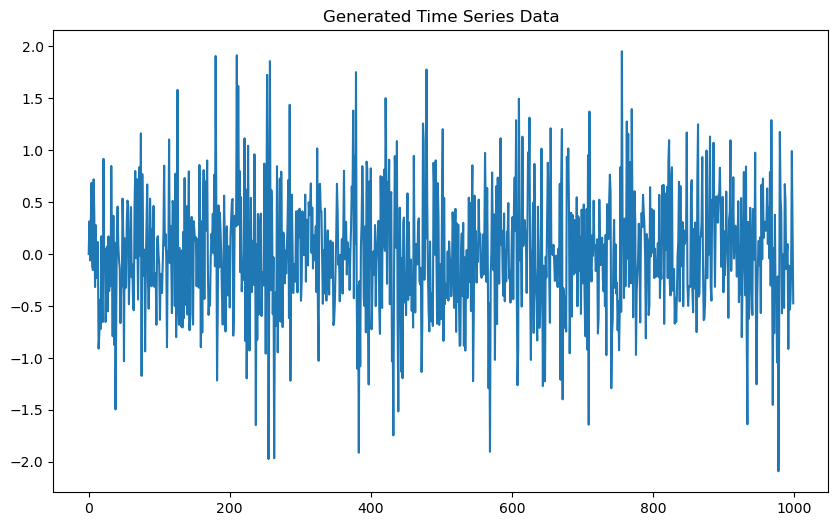

In [7]:
# 將數據轉換為pandas數據框
data = pd.DataFrame(y, columns=['y'])

# 繪製數據
plt.figure(figsize=(10, 6))
plt.plot(data['y'])
plt.title('Generated Time Series Data')
plt.show()

In [11]:
# 設定和估計ARCH模型
model = arch_model(data['y'], vol='ARCH', p=1)
results = model.fit(disp='off')#禁止所有輸出

results

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -872.212
Distribution:                  Normal   AIC:                           1750.42
Method:            Maximum Likelihood   BIC:                           1765.15
                                        No. Observations:                 1000
Date:                Fri, May 17 2024   Df Residuals:                      999
Time:                        19:58:56   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         7.3624e-03  1.845e-02      0.399      0.690 

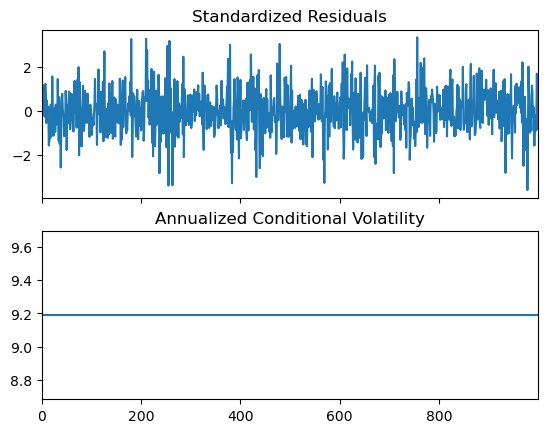

In [13]:
# 繪製擬合結果
fig = results.plot(annualize='D')
plt.show()